## **SCORING - Vitamin E: Workflow 5**
#### **Micha Birklbauer 2021-08-11**

In [1]:
import os
from shutil import copyfile
from itertools import islice
copyfile("../../../scripts/python/scoring.py", "scoring.py")

'scoring.py'

In [2]:
import pandas as pd
from scoring import *

#### **Load data:**

In [3]:
data_train = pd.read_csv("data_train.csv")
data_val = pd.read_csv("data_val.csv")
data_test = pd.read_csv("data_test.csv")
features = pd.read_csv("features.csv")

In [4]:
# data_train.info()

In [5]:
data_train

,INDEX,NAME,Hydrogen_Bond:ASP162B,Hydrophobic_Interaction:TYR142B,Pi-Cation_Interaction:LYS140B,Hydrophobic_Interaction:TYR383B,Salt_Bridge:LYS140B,Hydrophobic_Interaction:GLN168B,Hydrogen_Bond:TYR142B,Hydrophobic_Interaction:ARG138B,...,Hydrophobic_Interaction:ASP166B,Hydrophobic_Interaction:ALA157B,Hydrogen_Bond:ASP79B,Hydrogen_Bond:ASP106B,Pi-Cation_Interaction:ARG143B,Hydrophobic_Interaction:GLU134B,Salt_Bridge:LYS161B,Hydrophobic_Interaction:GLU172B,Salt_Bridge:ARG143B,LABEL
0,1,28|VitaminE_allmin_active|sdf|28,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
1,2,36|VitaminE_allmin_active|sdf|36,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,active
2,3,31|VitaminE_allmin_active|sdf|31,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,active
3,4,37|VitaminE_allmin_active|sdf|37,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
4,5,124|VitaminE_allmin_active|sdf|124,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,103|VitaminE_allmin_active|sdf|103,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
85,86,8|VitaminE_allmin_active|sdf|8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
86,87,14|VitaminE_allmin_active|sdf|14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
87,88,130|VitaminE_allmin_active|sdf|130,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active


In [6]:
print("Training dataset shape & Nr. of actives:")
print(data_train.shape, len(data_train.loc[data_train["LABEL"] == "active"]))

Training dataset shape & Nr. of actives:
(89, 103) 60


In [7]:
print("Validation dataset shape & Nr. of actives:")
print(data_val.shape, len(data_val.loc[data_val["LABEL"] == "active"]))

Validation dataset shape & Nr. of actives:
(23, 103) 16


In [8]:
print("Test dataset shape & Nr. of actives:")
print(data_test.shape, len(data_test.loc[data_test["LABEL"] == "active"]))

Test dataset shape & Nr. of actives:
(29, 103) 18


In [9]:
features

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrogen_Bond:ARG138B,0.381034,0.450000,0.068966
1,2,Hydrogen_Bond:ARG165B,0.182759,0.300000,0.482759
2,3,Hydrophobic_Interaction:VAL107B,0.167241,0.650000,0.482759
3,4,Hydrogen_Bond:LYS161B,0.158046,0.083333,0.241379
4,5,Hydrogen_Bond:ARG143B,0.157471,0.433333,0.275862
...,...,...,...,...,...
95,96,Hydrophobic_Interaction:ASP106B,0.010920,0.183333,0.172414
96,97,Hydrophobic_Interaction:LYS140B,0.002299,0.066667,0.068966
97,98,Hydrophobic_Interaction:TYR383B,0.001149,0.033333,0.034483
98,99,Hydrophobic_Interaction:PHE393B,0.001149,0.033333,0.034483


#### **Extract relevant features:**

In [10]:
optimized_values = get_optimized_feature_thresholds(features, data_train)

In [11]:
for item in islice(optimized_values["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat1 Accuracy: 0.8314606741573034
Key: 0.0, 0.0, 0.0: strat3 Accuracy: 0.8314606741573034
Key: 0.0, 0.0, 0.0: strat4 Accuracy: 0.8202247191011236
Key: 0.05, 0.0, 0.0: strat3 Accuracy: 0.8202247191011236
Key: 0.05, 0.0, 0.0: strat4 Accuracy: 0.8089887640449438


In [12]:
for item in islice(optimized_values["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat3 Area under the ROC curve: 0.8994252873563219
Key: 0.0, 0.0, 0.0: strat4 Area under the ROC curve: 0.8870689655172415
Key: 0.0, 0.0, 0.0: strat1 Area under the ROC curve: 0.8870689655172413
Key: 0.0, 0.0, 0.0: strat2 Area under the ROC curve: 0.8695402298850574
Key: 0.05, 0.0, 0.0: strat3 Area under the ROC curve: 0.8614942528735632


In [13]:
optimized_values_val = get_optimized_feature_thresholds(features, data_train, data_val)

In [14]:
for item in islice(optimized_values_val["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.0, 0.30000000000000004, 0.30000000000000004: strat3 Accuracy: 0.782608695652174
Key: 0.0, 0.30000000000000004, 0.30000000000000004: strat4 Accuracy: 0.782608695652174
Key: 0.0, 0.30000000000000004, 0.35000000000000003: strat3 Accuracy: 0.782608695652174
Key: 0.0, 0.30000000000000004, 0.4: strat3 Accuracy: 0.782608695652174
Key: 0.0, 0.65, 0.0: strat3 Accuracy: 0.782608695652174


In [15]:
for item in islice(optimized_values_val["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.0, 0.6000000000000001, 0.5: strat3 Area under the ROC curve: 0.5089285714285714
Key: 0.0, 0.6000000000000001, 0.5: strat4 Area under the ROC curve: 0.5089285714285714
Key: 0.0, 0.6000000000000001, 0.55: strat3 Area under the ROC curve: 0.5089285714285714
Key: 0.0, 0.6000000000000001, 0.55: strat4 Area under the ROC curve: 0.5089285714285714
Key: 0.0, 0.6000000000000001, 0.6000000000000001: strat3 Area under the ROC curve: 0.5089285714285714


In [16]:
features_filtered = get_relevant_features(features, 0.0, 0.30000000000000004, 0.4)
features_filtered

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
2,3,Hydrophobic_Interaction:VAL107B,0.167241,0.650000,0.482759
9,10,Hydrogen_Bond:ARG101B,0.122989,0.566667,0.689655
11,12,Hydrophobic_Interaction:TYR142B,0.114943,0.333333,0.448276
15,16,Hydrophobic_Interaction:PRO164B,0.092529,0.816667,0.724138
16,17,Hydrophobic_Interaction:GLN141B,0.091954,0.666667,0.758621
32,33,Hydrophobic_Interaction:ARG165B,0.056322,0.633333,0.689655


In [17]:
# some error checking -- should print nothing
for item in features_filtered["INTERACTION"].to_list():
    if item not in data_train.columns.to_list():
        print(item)

#### **Get positive features (e.g. features that have a positive impact on activeness) and negative features:**

In [18]:
positives, negatives = get_feature_impact(features_filtered)

In [19]:
positives

['Hydrophobic_Interaction:VAL107B', 'Hydrophobic_Interaction:PRO164B']

In [20]:
negatives

['Hydrogen_Bond:ARG101B',
 'Hydrophobic_Interaction:TYR142B',
 'Hydrophobic_Interaction:GLN141B',
 'Hydrophobic_Interaction:ARG165B']

#### **Score Compounds with different strategies & save results:**

In [21]:
save = False

# make data copies
train_result_strat1 = data_train.copy()
train_result_strat2 = data_train.copy()
train_result_strat3 = data_train.copy()
train_result_strat4 = data_train.copy()
# calculate scores
train_result_strat1["SCORE"] = train_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
train_result_strat2["SCORE"] = train_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
train_result_strat3["SCORE"] = train_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
train_result_strat4["SCORE"] = train_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
train_result_strat1_sorted = train_result_strat1.sort_values(by = "SCORE", ascending = False)
train_result_strat2_sorted = train_result_strat2.sort_values(by = "SCORE", ascending = False)
train_result_strat3_sorted = train_result_strat3.sort_values(by = "SCORE", ascending = False)
train_result_strat4_sorted = train_result_strat4.sort_values(by = "SCORE", ascending = False)
# save data
if save:
    train_result_strat1_sorted.to_csv("train_scores1.csv")
    train_result_strat2_sorted.to_csv("train_scores2.csv")
    train_result_strat3_sorted.to_csv("train_scores3.csv")
    train_result_strat4_sorted.to_csv("train_scores4.csv")

#### **Find best cutoff value and print metrics:**

*cutoff/accuracy for different strategies:*

In [22]:
print(
"Strategy 1: ",
get_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list()),
"\nStrategy 2: ",
get_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list()),
"\nStrategy 3: ",
get_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list()),
"\nStrategy 4: ",
get_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list())
)

Strategy 1:  [0, 0.6741573033707865] 
Strategy 2:  [0, 0.6741573033707865] 
Strategy 3:  [-2, 0.6741573033707865] 
Strategy 4:  [-2, 0.6853932584269663]


*accuracy for best cutoff:*

In [23]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 0, "accuracy"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 0, "accuracy"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), -2, "accuracy"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), -2, "accuracy")
)

Strategy 1:  0.6741573033707865 
Strategy 2:  0.6741573033707865 
Strategy 3:  0.6741573033707865 
Strategy 4:  0.6853932584269663


*false positive rate for best cutoff:*

In [24]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 0, "fpr"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 0, "fpr"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), -2, "fpr"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), -2, "fpr")
)

Strategy 1:  1.0 
Strategy 2:  1.0 
Strategy 3:  0.9655172413793104 
Strategy 4:  0.7931034482758621


#### **Calculate validation and test results:**

In [25]:
# make data copies
val_result_strat1 = data_val.copy()
val_result_strat2 = data_val.copy()
val_result_strat3 = data_val.copy()
val_result_strat4 = data_val.copy()
# calculate scores
val_result_strat1["SCORE"] = val_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
val_result_strat2["SCORE"] = val_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
val_result_strat3["SCORE"] = val_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
val_result_strat4["SCORE"] = val_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
val_result_strat1_sorted = val_result_strat1.sort_values(by = "SCORE", ascending = False)
val_result_strat2_sorted = val_result_strat2.sort_values(by = "SCORE", ascending = False)
val_result_strat3_sorted = val_result_strat3.sort_values(by = "SCORE", ascending = False)
val_result_strat4_sorted = val_result_strat4.sort_values(by = "SCORE", ascending = False)

In [26]:
# make data copies
test_result_strat1 = data_test.copy()
test_result_strat2 = data_test.copy()
test_result_strat3 = data_test.copy()
test_result_strat4 = data_test.copy()
# calculate scores
test_result_strat1["SCORE"] = test_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
test_result_strat2["SCORE"] = test_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
test_result_strat3["SCORE"] = test_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
test_result_strat4["SCORE"] = test_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
test_result_strat1_sorted = test_result_strat1.sort_values(by = "SCORE", ascending = False)
test_result_strat2_sorted = test_result_strat2.sort_values(by = "SCORE", ascending = False)
test_result_strat3_sorted = test_result_strat3.sort_values(by = "SCORE", ascending = False)
test_result_strat4_sorted = test_result_strat4.sort_values(by = "SCORE", ascending = False)

#### **Quality metrics for training and validation data:**

*training data:*

In [27]:
print(
"Strategy 1: ",
get_metrics(train_result_strat1, 0, pretty_print = True),
"\nStrategy 2: ",
get_metrics(train_result_strat2, 0, pretty_print = True),
"\nStrategy 3: ",
get_metrics(train_result_strat3, -2, pretty_print = True),
"\nStrategy 4: ",
get_metrics(train_result_strat4, -2, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6741573033707865, 'FPR': 1.0, 'AUC': 0.6097701149425288, 'Ya': 0.6741573033707865, 'EF': 1.0, 'REF': 100.0} 
Strategy 2:  {'ACC': 0.6741573033707865, 'FPR': 1.0, 'AUC': 0.6097701149425288, 'Ya': 0.6741573033707865, 'EF': 1.0, 'REF': 100.0} 
Strategy 3:  {'ACC': 0.6741573033707865, 'FPR': 0.9655172413793104, 'AUC': 0.6517241379310345, 'Ya': 0.6781609195402298, 'EF': 1.0059386973180076, 'REF': 98.33333333333333} 
Strategy 4:  {'ACC': 0.6853932584269663, 'FPR': 0.7931034482758621, 'AUC': 0.6393678160919539, 'Ya': 0.7051282051282052, 'EF': 1.045940170940171, 'REF': 91.66666666666667}


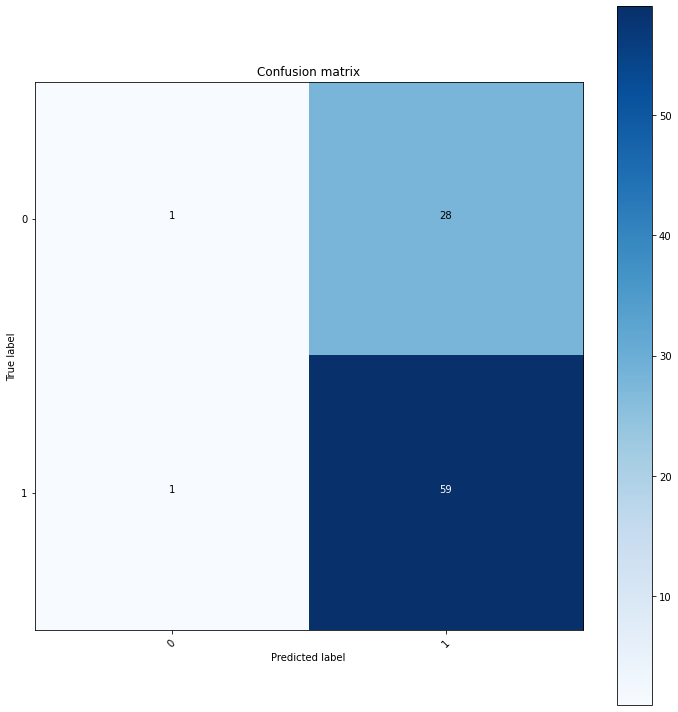

In [28]:
plot_confusion_matrix(get_metrics(train_result_strat3, -2)["CM"], classes = [0, 1], filename = "results/CM_train_strat3.png");

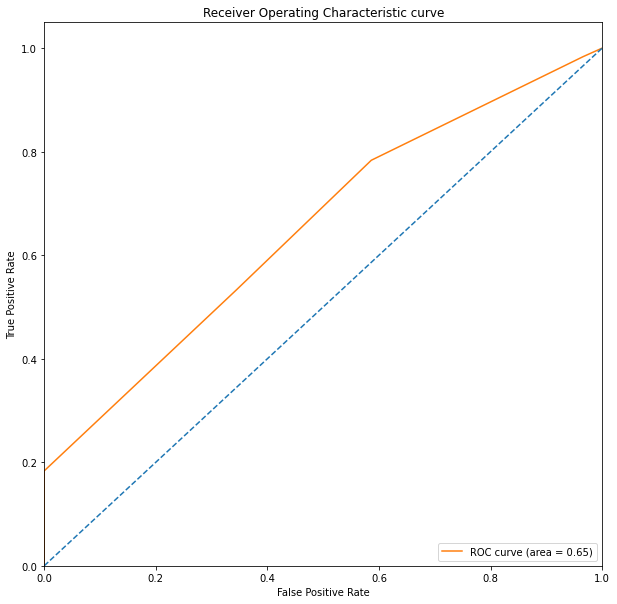

In [29]:
roc = get_metrics(train_result_strat3, -2)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_train_strat3.png");

*validation data:*

In [30]:
print(
"Strategy 1: ",
get_metrics(val_result_strat1, 0, pretty_print = True),
"\nStrategy 2: ",
get_metrics(val_result_strat2, 0, pretty_print = True),
"\nStrategy 3: ",
get_metrics(val_result_strat3, -2, pretty_print = True),
"\nStrategy 4: ",
get_metrics(val_result_strat4, -2, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6956521739130435, 'FPR': 1.0, 'AUC': 0.3883928571428571, 'Ya': 0.6956521739130435, 'EF': 1.0, 'REF': 100.0} 
Strategy 2:  {'ACC': 0.6956521739130435, 'FPR': 1.0, 'AUC': 0.3883928571428571, 'Ya': 0.6956521739130435, 'EF': 1.0, 'REF': 100.0} 
Strategy 3:  {'ACC': 0.782608695652174, 'FPR': 0.7142857142857143, 'AUC': 0.39285714285714285, 'Ya': 0.7619047619047619, 'EF': 1.0952380952380951, 'REF': 100.0} 
Strategy 4:  {'ACC': 0.7391304347826086, 'FPR': 0.7142857142857143, 'AUC': 0.38839285714285715, 'Ya': 0.75, 'EF': 1.078125, 'REF': 93.75}


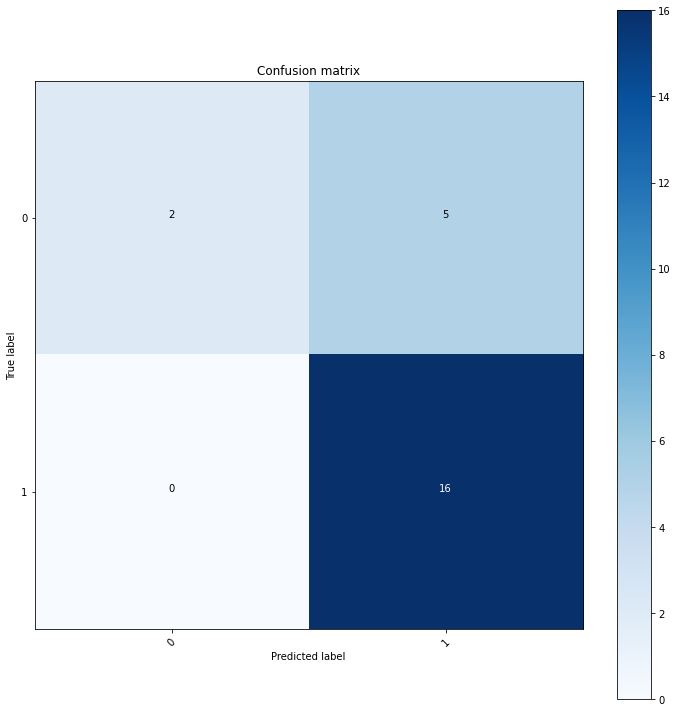

In [31]:
plot_confusion_matrix(get_metrics(val_result_strat3, -2)["CM"], classes = [0, 1], filename = "results/CM_val_strat3.png");

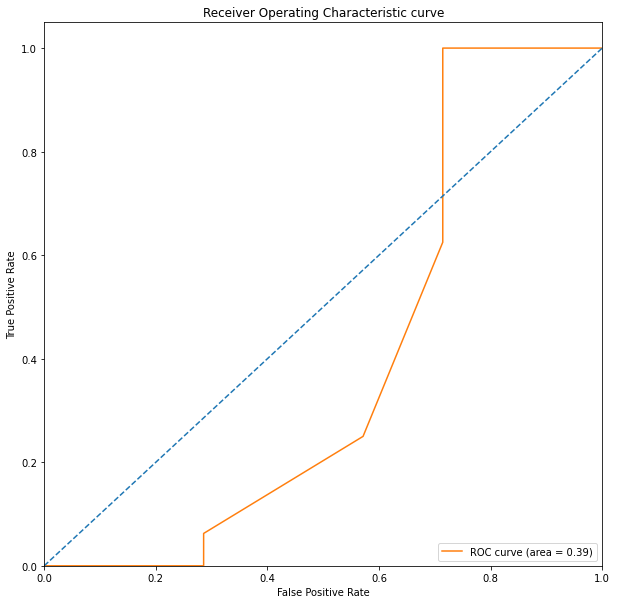

In [32]:
roc = get_metrics(val_result_strat3, -2)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_val_strat3.png");

*test data:*

In [33]:
print(
"Strategy 1: ",
get_metrics(test_result_strat1, 0, pretty_print = True),
"\nStrategy 2: ",
get_metrics(test_result_strat2, 0, pretty_print = True),
"\nStrategy 3: ",
get_metrics(test_result_strat3, -2, pretty_print = True),
"\nStrategy 4: ",
get_metrics(test_result_strat4, -2, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6206896551724138, 'FPR': 1.0, 'AUC': 0.24747474747474746, 'Ya': 0.6206896551724138, 'EF': 1.0, 'REF': 100.0} 
Strategy 2:  {'ACC': 0.6206896551724138, 'FPR': 1.0, 'AUC': 0.24747474747474746, 'Ya': 0.6206896551724138, 'EF': 1.0, 'REF': 100.0} 
Strategy 3:  {'ACC': 0.5517241379310345, 'FPR': 0.9090909090909091, 'AUC': 0.2853535353535353, 'Ya': 0.6, 'EF': 0.9666666666666666, 'REF': 83.33333333333333} 
Strategy 4:  {'ACC': 0.5517241379310345, 'FPR': 0.9090909090909091, 'AUC': 0.2676767676767676, 'Ya': 0.6, 'EF': 0.9666666666666666, 'REF': 83.33333333333333}


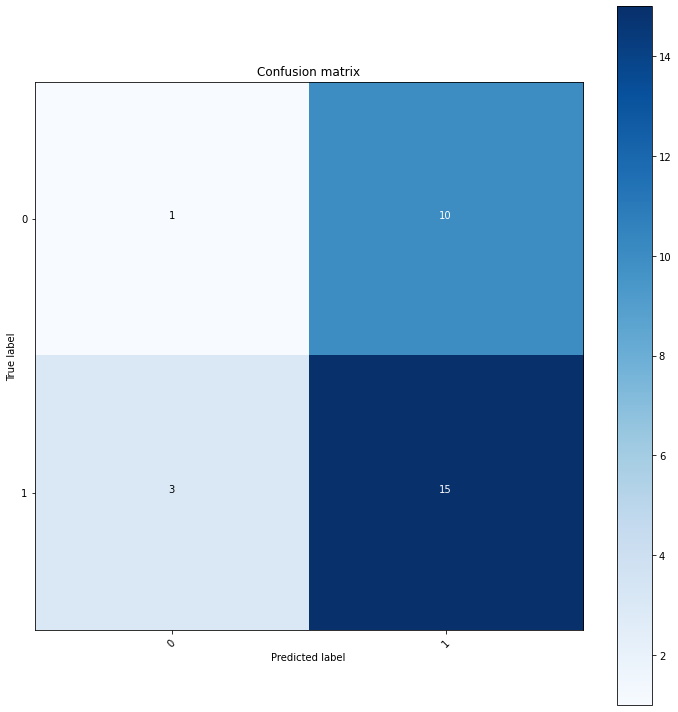

In [34]:
plot_confusion_matrix(get_metrics(test_result_strat3, -2)["CM"], classes = [0, 1], filename = "results/CM_test_strat3.png");

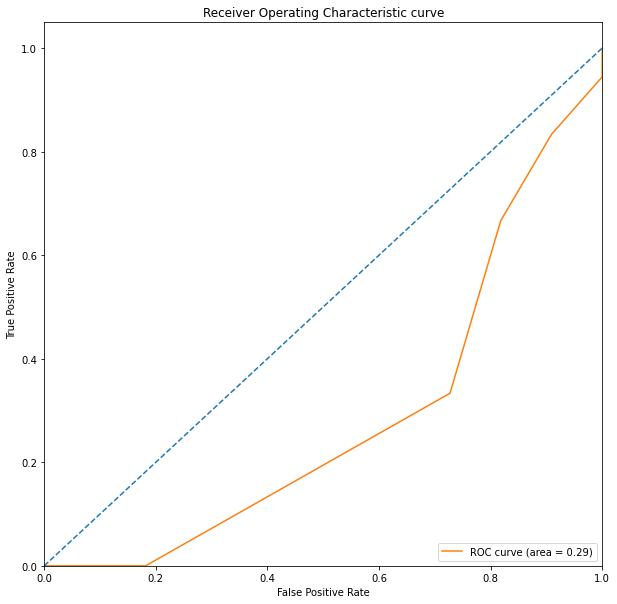

In [35]:
roc = get_metrics(test_result_strat3, -2)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_test_strat3.png");

#### **Clean up:**

In [36]:
os.remove("scoring.py")